#### Visualizing intermediate activations

In [1]:
from keras.models import load_model

/home/ouser/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = load_model('cats_and_dogs_small_2.h5')

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

#### Preprocessing a single image


In [4]:
img_path = '/home/ouser/kaggle/cats_and_dogs_small/test/cats/cat.1700.jpg'

In [5]:
from keras.preprocessing import image 
import numpy as np

In [6]:
img = image.load_img(img_path, target_size=(150, 150)) 
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) 
img_tensor /= 255.

#### Displaying the test picture

In [7]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

<Figure size 640x480 with 1 Axes>

In [8]:
prediction = model.predict(img_tensor)

In [9]:
if prediction[0][0] > .8:
    print('Doggy')
else:
    print('Cat');

Cat


#### Instantiating a model from an input tensor and a list of output tensors

In [10]:
from keras import models

In [11]:
layer_outputs = [layer.output for layer in model.layers[:8]]

In [12]:
layer_outputs

[<tf.Tensor 'conv2d_9/Relu:0' shape=(?, 148, 148, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d_9/MaxPool:0' shape=(?, 74, 74, 32) dtype=float32>,
 <tf.Tensor 'conv2d_10/Relu:0' shape=(?, 72, 72, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_10/MaxPool:0' shape=(?, 36, 36, 64) dtype=float32>,
 <tf.Tensor 'conv2d_11/Relu:0' shape=(?, 34, 34, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_11/MaxPool:0' shape=(?, 17, 17, 128) dtype=float32>,
 <tf.Tensor 'conv2d_12/Relu:0' shape=(?, 15, 15, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_12/MaxPool:0' shape=(?, 7, 7, 128) dtype=float32>]

In [13]:
model.input

<tf.Tensor 'conv2d_9_input:0' shape=(?, 150, 150, 3) dtype=float32>

In [14]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

#### Running the model in predict mode

In [15]:
activations = activation_model.predict(img_tensor)

In [16]:
first_layer_activation = activations[0]

In [17]:
print(first_layer_activation.shape)

(1, 148, 148, 32)


#### Visualizing the fourth channel

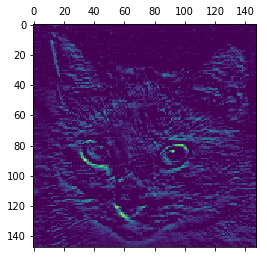

In [18]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 5], cmap='viridis')

#### Visualizing every channel in every intermediate activation

/home/ouser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


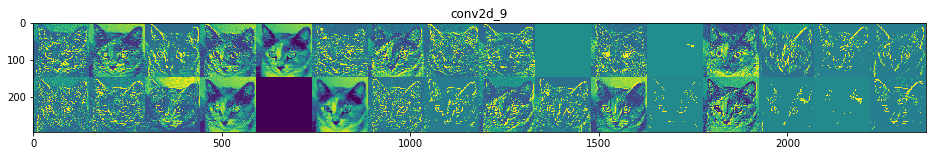

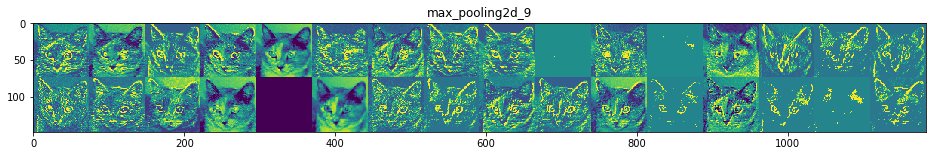

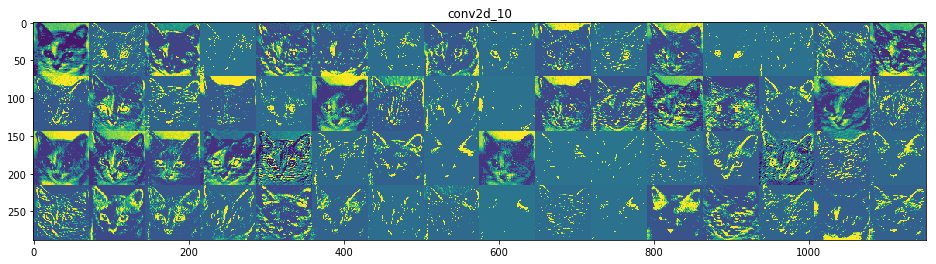

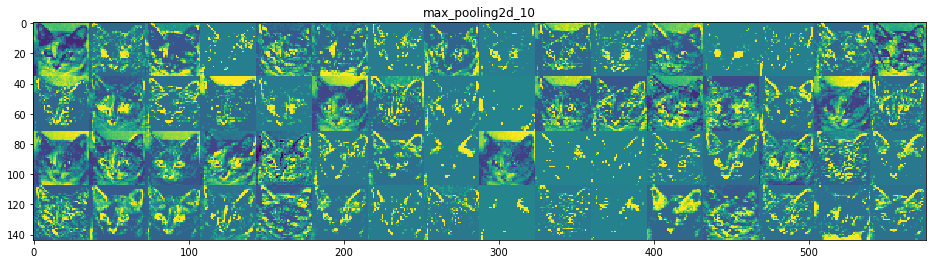

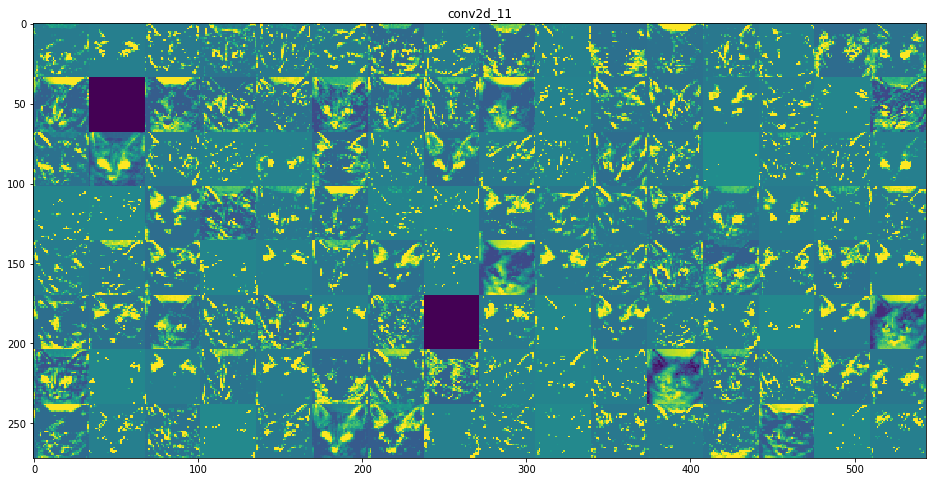

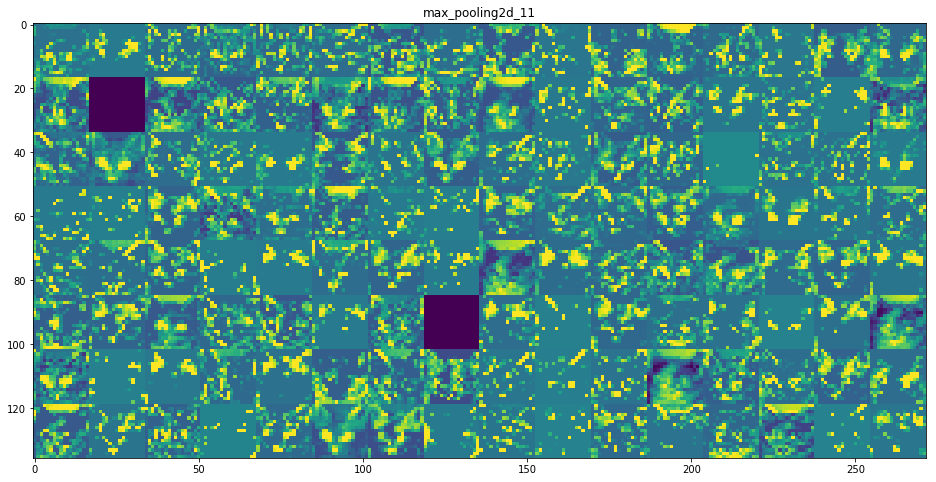

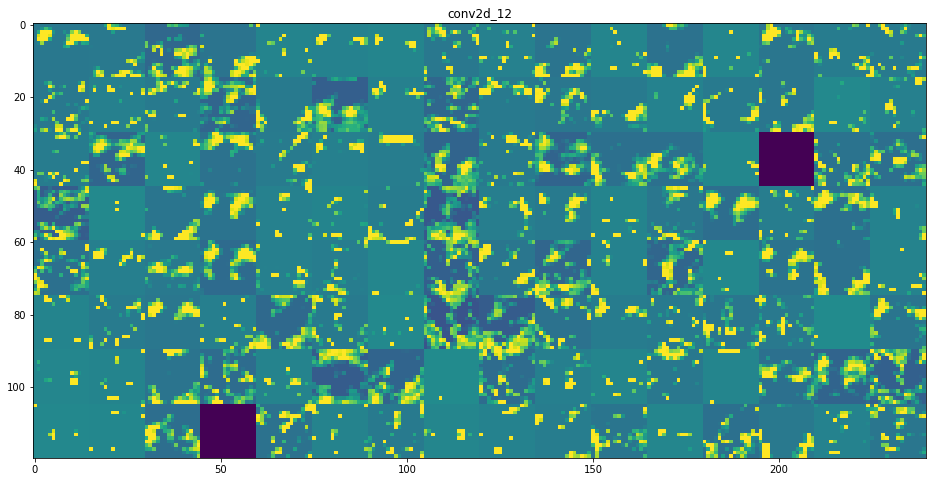

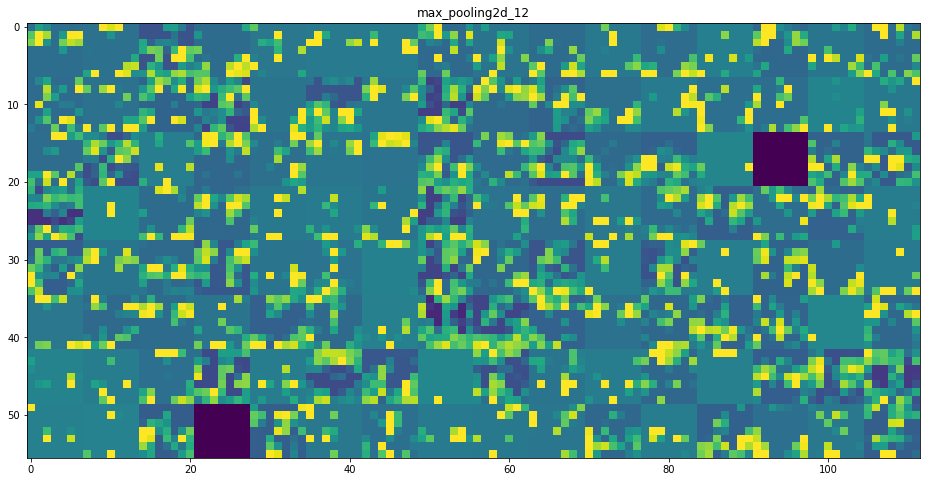

In [19]:
layer_names = []

for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
            
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

            

## Visualizing heatmaps of class activation

### Loading the VGG16 network with pretrained weights

In [20]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')

#### Preprocessing an input image for VGG16

In [21]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

In [22]:
img_path = '/home/ouser/kaggle/examples/elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
#x /= 255.
x = preprocess_input(x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


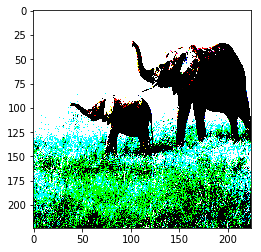

In [23]:
import matplotlib.pyplot as plt
plt.imshow(x[0])
plt.show()

In [24]:
 preds = model.predict(x)

In [25]:
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02504458', 'African_elephant', 0.90942156), ('n01871265', 'tusker', 0.08618244), ('n02504013', 'Indian_elephant', 0.004354585)]


In [26]:
np.argmax(preds[0])

386

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

#### Setting up the Grad-CAM algorithm

In [28]:
african_elephant_output = model.output[:, 386]

In [29]:
african_elephant_output

<tf.Tensor 'strided_slice:0' shape=(?,) dtype=float32>

In [30]:
last_conv_layer = model.get_layer('block5_conv3')

In [31]:
from keras import backend as K
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input],[pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)



#### Heatmap post-processing

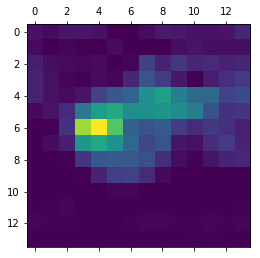

In [32]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [34]:
import cv2
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img
cv2.imwrite('/Users/fchollet/Downloads/elephant_cam.jpg', superimposed_img)

ModuleNotFoundError: No module named 'cv2'